In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df=pd.read_csv('train.csv')

In [304]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [305]:
df.shape

(891, 12)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we have to remove some unwanted columns

In [307]:
columns=['Parch','Cabin']
df.drop(columns,axis=1,inplace=True)

In [308]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Data Visualisation

<Axes: xlabel='Survived', ylabel='count'>

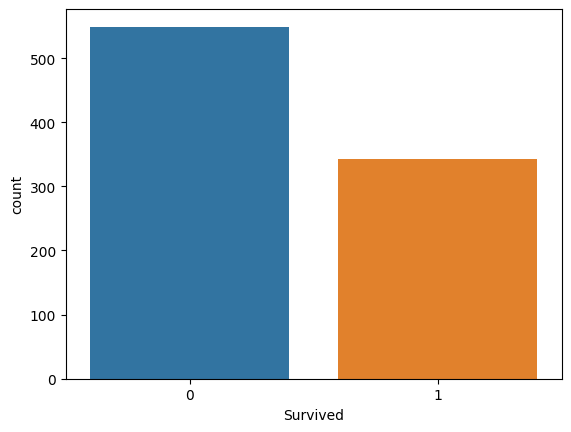

In [309]:
sns.countplot(x='Survived',data=df)

more than 500 did not survived and 300+ survived

<Axes: xlabel='Survived', ylabel='count'>

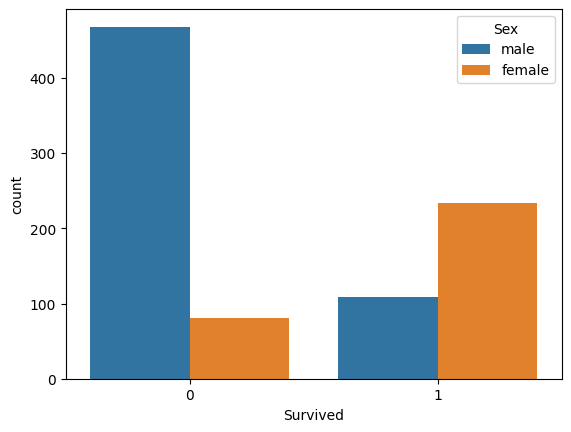

In [310]:
sns.countplot(x='Survived',hue='Sex',data=df)

0-Not Survived   1-Survived
Females are thrice more likely to be survived than males

<Axes: xlabel='Survived', ylabel='count'>

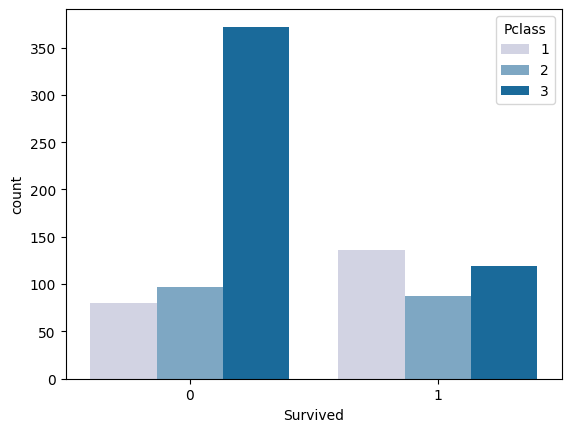

In [311]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='PuBu')

Most of the passengers who did not survive are from 3 class
1st class of passengers are more likely to survive

<Axes: ylabel='Frequency'>

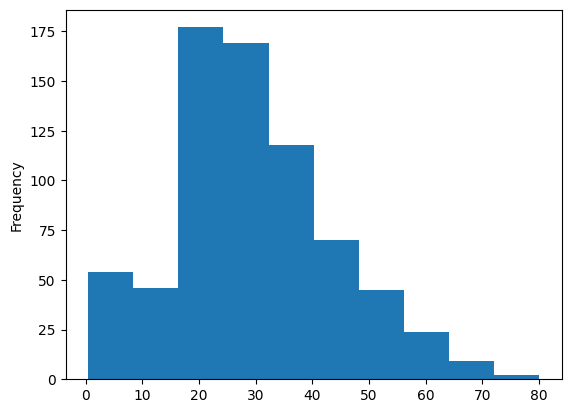

In [312]:
df['Age'].plot.hist()

Highest age group passengers who are travelled are from 20-40

<Axes: xlabel='SibSp', ylabel='count'>

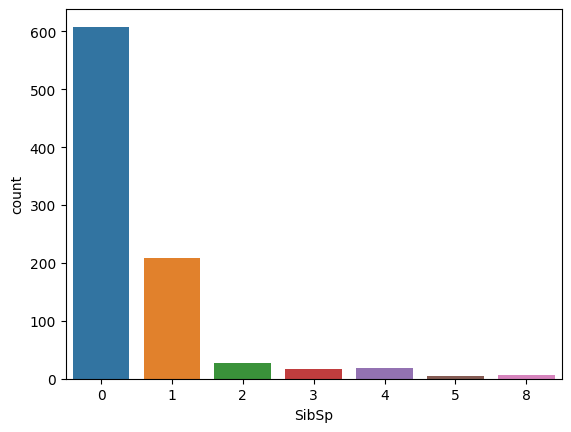

In [313]:
sns.countplot(x='SibSp',data=df)

Most of the Passengers do not have their siblings abroad

Data Wrangling

In [314]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Age has most null values

<Axes: >

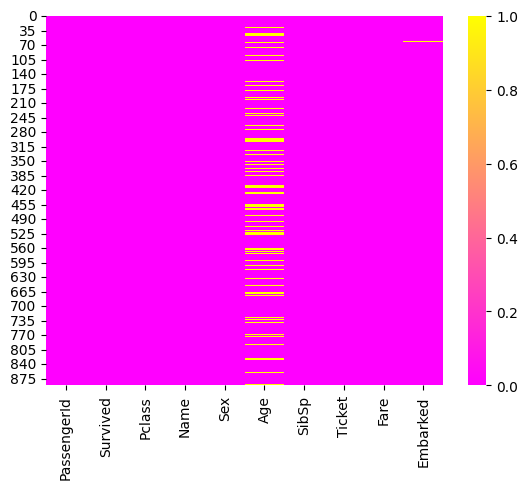

In [315]:
sns.heatmap(df.isnull(),cmap='spring')

Yellow color is showing the null values so Age has maximum null values

<Axes: xlabel='Pclass', ylabel='Age'>

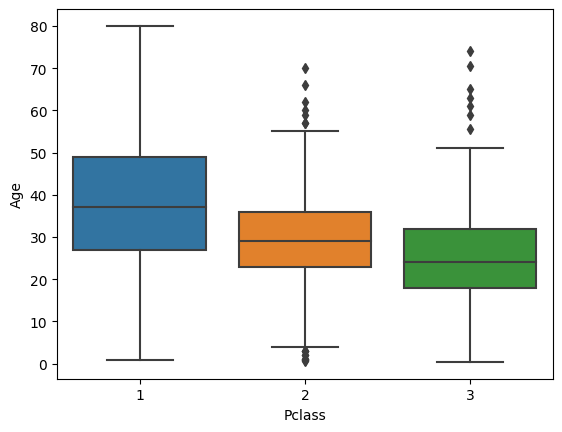

In [316]:
sns.boxplot(x='Pclass',y='Age',data=df)

We observe that older age group are travelling more in class1 and class2 than class 3

In [317]:
df.dropna(inplace=True)

In [318]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S


<Axes: >

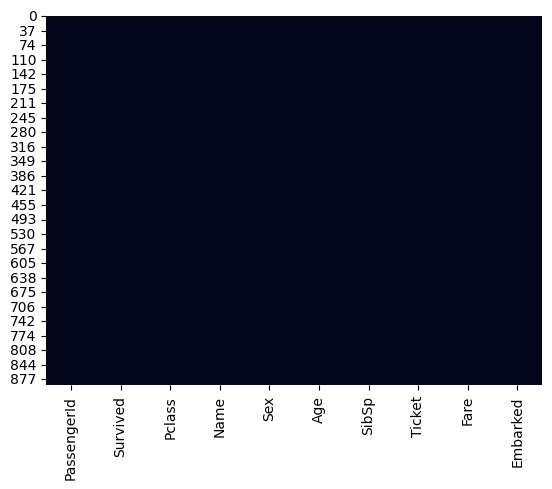

In [319]:
sns.heatmap(df.isnull(), cbar=False)

this shows that now we don't have any null values

In [320]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C


ML only understand numerical data so we will convert categorical data into numerical

In [321]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [322]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


we have dropped the first column beacuse one column is enough to determine sex

In [323]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


C=Cherbourg  Q=Queenstown  S=Southhampton
we can drop first column because from 2 columns we can determine easily(if Q ans S are 0 means person from C)

In [324]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [325]:
pd.get_dummies(df['Pclass']).head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


same we can remove 1 column.(if both value are 0 then person is from 1st class)

In [326]:
Pclass=pd.get_dummies(df['Pclass'],drop_first=True)
Pclass.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


So our data is now converted into categorical data

In [328]:
df=pd.concat([df,sex,embark,Pclass],axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
 10  male         712 non-null    uint8  
 11  Q            712 non-null    uint8  
 12  S            712 non-null    uint8  
 13  2            712 non-null    uint8  
 14  3            712 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 64.7+ KB


deleting the unwanted column

In [330]:
df.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)
df.head(3)

,Survived,Age,SibSp,Fare,male,Q,S,2,3
0,0,22.0,1,7.2500,1,0,1,0,1
1,1,38.0,1,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1


In [331]:
df.columns=df.columns.astype(str)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Age       712 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Fare      712 non-null    float64
 4   male      712 non-null    uint8  
 5   Q         712 non-null    uint8  
 6   S         712 non-null    uint8  
 7   2         712 non-null    uint8  
 8   3         712 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 31.3 KB


train data

In [333]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=15)

In [336]:
x_train.head()

,Age,SibSp,Fare,male,Q,S,2,3
407,3.0,1,18.7500,1,0,1,1,0
115,21.0,0,7.9250,1,0,1,0,1
390,36.0,1,120.0000,1,0,1,0,0
764,16.0,0,7.7750,1,0,1,0,1
39,14.0,1,11.2417,0,0,0,0,1


In [337]:
x_train.shape

(498, 8)

In [338]:
x_test.shape

(214, 8)

In [339]:
print(y_train.shape)
print(y_train.head())

(498,)
407    1
115    0
390    1
764    0
39     1
Name: Survived, dtype: int64


Logistic Regression

In [340]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [341]:
model.fit(x_train,y_train)

c:\Users\RAWAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [354]:
prediction=model.predict(x_test)

In [353]:
from sklearn.metrics import confusion_matrix

In [355]:
confusion_matrix(y_test,prediction)

array([[110,  21],
       [ 19,  64]], dtype=int64)

In [356]:
from sklearn.metrics import accuracy_score

In [357]:
accuracy_score(y_test,prediction)

0.8130841121495327

In [360]:
model.score(x_test,y_test)

0.8130841121495327

We have accuracy more than 80% which is very good